In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

 - http://www.users.on.net/~zygmunt.szpak/ellipsefitting.html
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html#scipy.optimize.least_squares
 - https://en.wikipedia.org/wiki/Rayleigh_quotient

In [2]:
def scale(a=2, b=1):
    return np.array([[a, 0], [0, b]])

In [3]:
def rotation(alpha=np.pi/4):
    return np.array([
        [np.cos(alpha), -np.sin(alpha)],
        [np.sin(alpha),  np.cos(alpha)]
    ])

In [4]:
def circle(phi, rho=1):
    return rho*np.array([np.cos(phi), np.sin(phi)])

In [5]:
def ellipse(phi, rho, alpha, S, Xc):
    C = circle(phi, rho=rho)
    R = rotation(alpha)
    S = scale(*S)
    Xc = np.array(Xc)
    return np.dot(R, np.dot(S, C)).T + Xc

In [6]:
t = np.linspace(np.pi/2, 3/2*np.pi, 200)
t2 = np.linspace(0, 2*np.pi, 200)
e = np.random.randn(t.size)*1e-1

In [7]:
X = ellipse(phi=t, rho=2+e, alpha=np.pi/4, S=[2, 1], Xc=[1, 1])
Xr = ellipse(phi=t2, rho=2, alpha=np.pi/4, S=[2, 1], Xc=[1, 1])

In [8]:
X.shape

(200, 2)

In [9]:
def f(x, a, b, c, d, e):
    return a*x[:,0]**2 + b*x[:,0]*x[:,1] + c*x[:,1]**2 + d*x[:,0] + e*x[:,1]

In [10]:
def f2(x, x0, x1, k0, k1):
    return k0*(x[:,0] - x0)**2 + k1*(x[:,1] - x1)**2

In [11]:
optsol, optcov = optimize.curve_fit(f, X, np.ones_like(X[:,0]))

In [12]:
optsol

array([ 0.17619764, -0.21602536,  0.17752036, -0.14165578, -0.14251744])

In [13]:
def coef(A,B,C,D,E,F):
    return [
        -np.sqrt(2*(A*E**2 + C*D**2 - B*D*E + (B**2-4*A*C)*F)*((A+C)+np.sqrt((A-C)**2+B**2)))/(B**2-4*A*C),
        -np.sqrt(2*(A*E**2 + C*D**2 - B*D*E + (B**2-4*A*C)*F)*((A+C)-np.sqrt((A-C)**2+B**2)))/(B**2-4*A*C),
        (2*C*D-B*E)/(B**2-4*A*C),
        (2*A*E-B*D)/(B**2-4*A*C),
    ]

In [14]:
r = np.array(coef(*(list(optsol)+[-1])))
r

array([4.08109027, 2.00624521, 1.03356667, 1.03028757])

\begin{align}
  a, b    &= \frac{-\sqrt{2 \Big(A E^2 + C D^2 - B D E + (B^2 - 4 A C) F\Big)\left((A + C) \pm \sqrt{(A - C)^2 + B^2}\right)}}{B^2 - 4 A C} \\
  x_\circ  &= \frac{2CD - BE}{B^2 - 4AC} \\[3pt]
  y_\circ  &= \frac{2AE - BD}{B^2 - 4AC} \\[3pt]
    \Theta &= \begin{cases}
                \arctan\left(\frac{1}{B}\left(C - A - \sqrt{(A - C)^2 + B^2}\right)\right)
                         & \text{for } B \ne 0 \\
                       0 & \text{for } B = 0,\ A < C \\
                90^\circ & \text{for } B = 0,\ A > C \\
              \end{cases}
\end{align}

In [15]:
Xhat = ellipse(phi=t2, rho=1, alpha=np.pi/4, S=r[:2], Xc=r[2:])

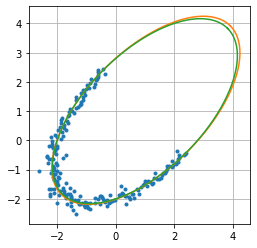

In [16]:
fig, axe = plt.subplots()
axe.plot(X[:,0], X[:,1], '.')
axe.plot(Xhat[:,0], Xhat[:,1])
axe.plot(Xr[:,0], Xr[:,1])
axe.set_aspect('equal', adjustable='box')
axe.grid()

In [17]:
np.sqrt(np.sum((f(X, *optsol) - 1)**2))

1.5388100171220314

In [18]:
optsol, optcov = optimize.curve_fit(f2, X, np.ones_like(X[:,0]))

In [19]:
optsol

array([-0.14797862, -0.13836625,  0.2128316 ,  0.21456547])

In [20]:
Xb = np.array([X[:,0]**2, X[:,0]*X[:,1], X[:,1]**2, X[:,0], X[:,1], np.ones_like(X[:,0])]).T

In [21]:
M = np.dot(Xb.T, Xb)

In [22]:
l, U = np.linalg.eigh(M)

In [23]:
l

array([2.05644854e+00, 6.59554184e+01, 3.59642664e+02, 7.09462456e+02,
       1.03527705e+03, 3.20759518e+03])